In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:/Traffic_Signs_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [2]:

data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'D:\\Traffic_Signs_Recognition'

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except Expception as e:
            print(e)


In [5]:
data = np.array(data)
labels = np.array(labels)

In [6]:
np.save('./training/data',data)
np.save('./training/target',labels)

In [7]:
data=np.load('./training/data.npy')
lables=np.load('./training/target.npy')


In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train,X_test,y_train, y_test = train_test_split(data,labels,test_size=0.2,random_state=0)

In [10]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
y_train= to_categorical(y_train,43)
y_test= to_categorical(y_test,43)

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/25
981/981 [==============================] - 108s 101ms/step - loss: 1.6034 - accuracy: 0.5866 - val_loss: 0.2827 - val_accuracy: 0.9398
Epoch 2/25
981/981 [==============================] - 99s 100ms/step - loss: 0.4800 - accuracy: 0.8652 - val_loss: 0.1263 - val_accuracy: 0.9672
Epoch 3/25
981/981 [==============================] - 98s 100ms/step - loss: 0.3172 - accuracy: 0.9105 - val_loss: 0.0774 - val_accuracy: 0.9796
Epoch 4/25
981/981 [==============================] - 98s 100ms/step - loss: 0.2668 - accuracy: 0.9258 - val_loss: 0.0802 - val_accuracy: 0.9769
Epoch 5/25
981/981 [==============================] - 103s 105ms/step - loss: 0.2375 - accuracy: 0.9340 - val_loss: 0.0789 - val_accuracy: 0.9804
Epoch 6/25
981/981 [==============================] - 99s 101ms/step - loss: 0.2172 - accuracy: 0.9414 - val_loss: 0.1132 - val_accuracy: 0.9694
Epoch 7/25
981/981 [==============================] - 98s 100ms/step - loss: 0.2079 - accuracy: 0.9430 - val_loss: 0.0525 - val_

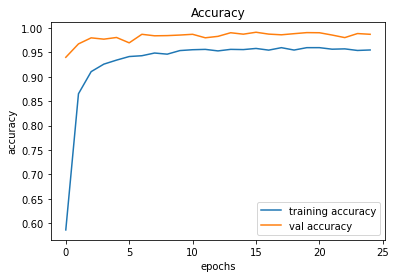

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

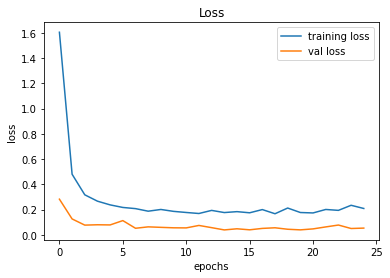

In [16]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [17]:
def testing(testcsv):
    y_test=pd.read_csv(testcsv)
    label=y_test["ClassId"].values
    imgs=y_test["Path"].values
    data=[]
    for img in imgs:
        image=Image.open(img)
        image=image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [18]:
X_test,label=testing('Test.csv')

In [19]:
Y_pred =np.argmax(model.predict(X_test),axis=1)
Y_pred

395/395 [==============================] - 11s 26ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,Y_pred))

0.9544734758511481


In [21]:
model.save("./training/TSR.h5")

In [22]:
import os
os.chdir(r'D:\Traffic_Signs_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [23]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons'}

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = np.argmax(model.predict(X_test),axis=1)
    return image,Y_pred

1/1 [==============================] - 0s 341ms/step
Predicted traffic sign is:  Bumpy road


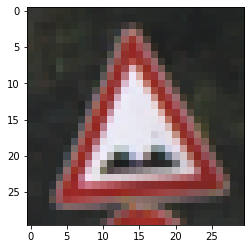

In [25]:

plot,prediction = test_on_img(r'D:\Traffic_Signs_Recognition\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model("./training/TSR.h5")

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons'}

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')
top.configure(background='#ADD8E6')

label=Label(top,background='#ADD8E6', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = np.argmax(model.predict([image])[0])
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='black', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.42,rely=0.72)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/4),(top.winfo_height()/4)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)


label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#ADD8E6',foreground='black')
heading.pack()
top.mainloop()